# A Comparison of State Use of SFLRF Funds for Vaccination Programs and Vaccination Rates in Each State



### Data Sources:
CDC - "COVID-19 Vaccinations in the United States, Jurisdiction"
csv downloaded 5/11/23
https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

EARN/EPI - "EARN SLFRF Workbook for Q4 2022" compiled by Dave Kamper of the Economic Policy Institute (dkamper@epi.org) from Treasury reports by states and local jurisidictions who received funding, and other data sources as detailed in the workbook.

## Production Code (Team: Put your code here after it is complete and ready to go)

## Evan Work Area

In [1]:
### import dependencies and setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
from pathlib import Path

In [2]:
### Hide error messages
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
### Load csv file(s)
all_states_sheet = Path("Resources/EARN_all_states.csv")


### Read csv file(s) as a DataFrame
all_states_df = pd.read_csv(all_states_sheet, skipinitialspace= True, low_memory=False)


### preview the raw DataFrame
print(f"There are {len(all_states_df['Project ID'])} rows in the unfiltered DataFrame.")

all_states_df.columns = all_states_df.columns.str.strip()

#all_states_df

There are 35710 rows in the unfiltered DataFrame.


In [4]:
### Review list of NA values in the 'Project Description' column
nan_values = all_states_df[all_states_df['Project Description'].isna()]

# print(len(nan_values))
print(f'There are {len(nan_values)} columns with NA values in "Project Description" column:')

#nan_values

There are 4 columns with NA values in "Project Description" column:


In [5]:
### Drop these rows where the column has NaN value
    # source: https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
    
all_states_df = all_states_df.dropna(subset=['Project Description'], how='all')

### confirm the NaN rows were dropped by reviewing column length count:

print(f'The DataFrame now has {len(all_states_df["Project ID"])} rows of data:')
all_states_df.head(1)


The DataFrame now has 35706 rows of data:


,Project ID,Recipient-ID,Recipient Name,State/Territory,StateList,Reporting Tier,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Community benefit agreement? (Infrastructure Only),Complying with David Bacon? (Infrastructure Only),Project labor agreement? (Infrastructure Only),Primary Demographic Served (Select Expenditure Categories Only)
0,TPN-039343,RCP-039196,"Woodbury County, Iowa",Iowa,Iowa,Tier 2. Metropolitan cities and counties with...,Local Government,Cancelled,LEC Main project,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,HVAC to mitigate covid,-,-,-,NaN,NaN,NaN,1 Imp General Public


In [6]:
### Make the Project Description values all lowercase for value search:
all_states_df['Project Description'] = all_states_df['Project Description'].str.lower()

print(f'The Project Description column has been set to lowercase for all string values:')
all_states_df.head(2)

The Project Description column has been set to lowercase for all string values:


,Project ID,Recipient-ID,Recipient Name,State/Territory,StateList,Reporting Tier,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Community benefit agreement? (Infrastructure Only),Complying with David Bacon? (Infrastructure Only),Project labor agreement? (Infrastructure Only),Primary Demographic Served (Select Expenditure Categories Only)
0,TPN-039343,RCP-039196,"Woodbury County, Iowa",Iowa,Iowa,Tier 2. Metropolitan cities and counties with...,Local Government,Cancelled,LEC Main project,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,hvac to mitigate covid,-,-,-,NaN,NaN,NaN,1 Imp General Public
1,TPN-039461,RCP-036070,"Lexington-Fayette Urban County, Kentucky",Kentucky,Kentucky,"Tier 1. States, U.S. territories, metropolitan...",Local Government,Cancelled,Housing Stabilization - Salvation Army,6-Revenue Replacement,6.1-Provision of Government Services,financial assistance to salvation army to impr...,-,-,-,NaN,NaN,NaN,NaN


In [7]:
### Brainstorm a list of words to filter the 'Project Description' column by.
    # this list will be used to filter that column so that we are only working with projects that
    # are actually vaccine related.

search_term_list = ['immunize', 'immunization','access to vaccines', 'spikevax', 'bivalent', 'novavax', 'two-dose', 
                    'single-dose', 'emergency use authoriztaion', 'vaccine coverage', 
                    'vaccine access', 'vaccine distribution', 'distribute vaccines', 'vaccine', 'vaccination', 'vaccinate', 'moderna', 'pfizer', 'johnson & johnson', 'janssen']

#print(search_term_list)

In [8]:
### Filter the dataframe column 'Project Description'
    ## source: https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

    
covid_projects_df = all_states_df[all_states_df['Project Description'].str.contains('|'.join(search_term_list))]


# print(len(all_states_df['Project Description']))
print(f'The number of rows containing vaccine search criteria terms is {len(covid_projects_df["Project ID"])}')
covid_projects_df.head(2)


The number of rows containing vaccine search criteria terms is 1095


,Project ID,Recipient-ID,Recipient Name,State/Territory,StateList,Reporting Tier,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Community benefit agreement? (Infrastructure Only),Complying with David Bacon? (Infrastructure Only),Project labor agreement? (Infrastructure Only),Primary Demographic Served (Select Expenditure Categories Only)
46,TPN-072775,RCP-036988,"Highlands County, Florida",Florida,Florida,Tier 2. Metropolitan cities and counties with...,Local Government,Cancelled,Hurricane Shelter,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,large facility designed to shelter special nee...,-,-,-,NaN,NaN,NaN,1 Imp General Public
78,TPN-065542,RCP-036805,"Thurston County, Washington",Washington,Washington,"Tier 1. States, U.S. territories, metropolitan...",Local Government,Cancelled,COVID-19 Vaccination Incentive Program,1-Public Health,1.1-COVID-19 Vaccination,"as of july 31, 2021, 49.6 percent of the thurs...",-,-,-,NaN,NaN,NaN,1 Imp General Public


In [9]:
### Now format all budget related columns as integers for summing in the .groupby step:

# print(all_states_df.dtypes)
# print(f'\n----------------------------\n')
# print(covid_projects_df.dtypes)

In [10]:
### Clean up values preventing change of data type to int
covid_projects_df[['Adopted Budget','Total Cumulative Obligations',
                   'Total Cumulative Expenditures']] = covid_projects_df[['Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures']].replace(['-', ' '] ,'', regex=True)


numeric_cols = ['Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures']


### Convert budget columns to int for summarizing in groupby:
covid_projects_df = covid_projects_df.replace(',','', regex=True)
covid_projects_df[numeric_cols] = covid_projects_df[numeric_cols].apply(pd.to_numeric)

### Confirm monetary columns are float/int datatypes:
# print(covid_projects_df['Adopted Budget'].unique())
print(covid_projects_df.dtypes)
#covid_projects_df.head(3)


Project ID                                                          object
Recipient-ID                                                        object
Recipient Name                                                      object
State/Territory                                                     object
StateList                                                           object
Reporting Tier                                                      object
Recipient Type                                                      object
Completion Status                                                   object
Project Name                                                        object
Expenditure Category Group                                          object
Expenditure Category                                                object
Project Description                                                 object
Adopted Budget                                                     float64
Total Cumulative Obligati

In [11]:
### Group the filtered dataframe by state, summing applicable $ value columns
    # if errors, clean columns causing errors. 
    # eg) 'Adopted Budget' column has values containing "-". This might prevent the .sum() function from working

covid_sums_df = covid_projects_df.groupby(['State/Territory'], as_index=False).sum(['Adopted Budget', 'Total Cumulative Obligations', 
                                                                        'Total Cumulative Expenditures'])

print(f'The column headers for the state_spending_df are:\n\n {covid_sums_df.columns}')
covid_sums_df.head(1)

The column headers for the state_spending_df are:

 Index(['State/Territory', 'Adopted Budget', 'Total Cumulative Obligations',
       'Total Cumulative Expenditures'],
      dtype='object')


,State/Territory,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures
0,Alabama,2900561.02,4714001.87,2736680.11


In [12]:
### Add column of state name abbreviations:
    # source: https://gist.github.com/rogerallen/1583593

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands": "VI",
}
    
### add abbreviated state name column and reorder so the abbrev is after full state name column:
covid_sums_df['Location'] = covid_sums_df['State/Territory'].map(us_state_to_abbrev)
covid_sums_df = covid_sums_df[['State/Territory', 'Location', 'Adopted Budget', 
                                       'Total Cumulative Obligations', 'Total Cumulative Expenditures']]

covid_sums_df.head()


,State/Territory,Location,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures
0,Alabama,AL,2.900561e+06,4.714002e+06,2.736680e+06
1,American Samoa,AS,2.550525e+07,2.413012e+07,2.278012e+07
2,Arizona,AZ,8.604835e+07,5.382413e+07,5.152932e+07
3,Arkansas,AR,2.332340e+06,2.515517e+06,1.719264e+06
4,California,CA,7.334040e+08,6.470832e+08,5.744078e+08


In [13]:
### Groupby and count 'Project ID' in the covid_projects_df
### then pd.merge onto state_spending_df, inplace=True

covid_counts_df = covid_projects_df.groupby(['State/Territory'], as_index=False).count()[['State/Territory', 'Project ID']]

covid_counts_df.head()


,State/Territory,Project ID
0,Alabama,9
1,American Samoa,3
2,Arizona,20
3,Arkansas,12
4,California,111


In [14]:
### Now merge the vaccine projects count by state onto the state_spending_df:

state_spending_df = pd.merge(covid_sums_df, covid_counts_df, how ='inner', on =('State/Territory'))


In [15]:
### Rename the counted 'Project ID' column for clarity:
state_spending_df.rename(columns = {'Project ID':'Count of Vaccine Projects'}, inplace = True)

state_spending_df

,State/Territory,Location,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Count of Vaccine Projects
0,Alabama,AL,2.900561e+06,4.714002e+06,2.736680e+06,9
1,American Samoa,AS,2.550525e+07,2.413012e+07,2.278012e+07,3
2,Arizona,AZ,8.604835e+07,5.382413e+07,5.152932e+07,20
3,Arkansas,AR,2.332340e+06,2.515517e+06,1.719264e+06,12
4,California,CA,7.334040e+08,6.470832e+08,5.744078e+08,111
5,Colorado,CO,1.982225e+08,1.716757e+08,1.309645e+08,59
6,Connecticut,CT,1.068400e+07,4.957381e+06,2.758473e+06,20
7,Delaware,DE,1.101077e+07,1.674293e+06,1.123534e+06,8
8,District of Columbia,DC,1.874133e+07,1.421278e+07,1.406035e+07,5
9,Florida,FL,3.926415e+07,4.885380e+07,3.761977e+07,55


In [16]:
### "all_us_projects_df" is for (2) from Joanna's slack message request:
all_us_projects_df = all_states_df[['Recipient Name', 'State/Territory', 'Recipient Type', 
                                    'Completion Status', 'Project Name', 'Expenditure Category Group', 'Expenditure Category', 
                                    'Project Description', 'Adopted Budget', 'Total Cumulative Obligations', 
                                    'Total Cumulative Expenditures']].copy()


all_us_projects_df['State/Territory'] = all_us_projects_df['State/Territory'].map(us_state_to_abbrev)
all_us_projects_df.rename(columns = {'State/Territory':'State'}, inplace = True)

all_us_projects_df[['Adopted Budget','Total Cumulative Obligations',
                   'Total Cumulative Expenditures']] = all_us_projects_df[['Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures']].replace(['-', ' '] ,'', regex=True)


numeric_cols = ['Adopted Budget',
       'Total Cumulative Obligations', 'Total Cumulative Expenditures']


### convert budget columns to int for summarizing in groupby:
all_us_projects_df = all_us_projects_df.replace(',','', regex=True)
all_us_projects_df[numeric_cols] = all_us_projects_df[numeric_cols].apply(pd.to_numeric)

# all_us_projects_df.dtypes
all_us_projects_df.head(3)

,Recipient Name,State,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures
0,Woodbury County Iowa,IA,Local Government,Cancelled,LEC Main project,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,hvac to mitigate covid,NaN,NaN,NaN
1,Lexington-Fayette Urban County Kentucky,KY,Local Government,Cancelled,Housing Stabilization - Salvation Army,6-Revenue Replacement,6.1-Provision of Government Services,financial assistance to salvation army to impr...,NaN,NaN,NaN
2,Lexington-Fayette Urban County Kentucky,KY,Local Government,Cancelled,Non-Profit Capital Grants,6-Revenue Replacement,6.1-Provision of Government Services,the nonprofit capital project grants program i...,NaN,NaN,NaN


In [17]:
### "us_covid_projects_df" is for (3) from Joanna's slack message:
us_covid_projects_df = all_us_projects_df[all_us_projects_df['Project Description'].str.contains('|'.join(search_term_list))]


# print(len(all_states_df['Project Description']))
print(f'The number of rows containing covid/vaccine search criteria terms is {len(us_covid_projects_df["Project Name"])}')
us_covid_projects_df.head()

The number of rows containing covid/vaccine search criteria terms is 1095


,Recipient Name,State,Recipient Type,Completion Status,Project Name,Expenditure Category Group,Expenditure Category,Project Description,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures
46,Highlands County Florida,FL,Local Government,Cancelled,Hurricane Shelter,1-Public Health,1.4-Prevention in Congregate Settings (Nursing...,large facility designed to shelter special nee...,NaN,NaN,NaN
78,Thurston County Washington,WA,Local Government,Cancelled,COVID-19 Vaccination Incentive Program,1-Public Health,1.1-COVID-19 Vaccination,as of july 31 2021 49.6 percent of the thursto...,NaN,NaN,NaN
121,Larimer County Colorado,CO,Local Government,Cancelled,Community Health Mapping/Dashboard,1-Public Health,1.14-Other Public Health Services,larimer county is embarking on a project to co...,NaN,NaN,NaN
193,Hoboken City New Jersey,NJ,Local Government,Cancelled,Covid-19 Vaccination Staffing,1-Public Health,1.1-COVID-19 Vaccination,contract staffing for the city's covid-19 vacc...,NaN,NaN,NaN
213,State Of New Hampshire,NH,State/DC,Cancelled,RPHN Clinics-Vaccine Administration,1-Public Health,1.1-COVID-19 Vaccination,request to utilize american rescue plan act (a...,NaN,NaN,NaN


## Aaliyah Work Area

In [18]:
### import and read the state_summary.csv
### Load csv file(s)
state_summary_sheet = Path("Resources/state_summary.csv")


### Read csv file(s) as a DataFrame
state_summary_df = pd.read_csv(state_summary_sheet, skipinitialspace= True)


state_summary_df.head()

,State,Total state allocation (from the fed),total state plus total local federal grant,Total state spending,"Spent as of Sept 30, 2022",Total state obligated,Total state budgeted,Share of state allocation spent,Share of state allocation obligated,Share of state allocation budgeted,...,Share of local spent,Share of local obligated,Share of local budgeted,Share of state + local spent,Change in state spending since Sept (as share of total allocation),Change in local spending since Sept,Change in local government employment (inclusing public education) from Feb 2020 to Jan 2023,"Percentage change in local government employment, February 2020-Jan 2023","Change in state government jobs, Feb 2020 to Jan 2023 (thousands","Percentage change in state government jobs, Feb 2020 to Jan 2023"
0,Alabama,"$2,120,279,417","$3,287,582,722","$348,913,764","$340,112,472","$350,199,320","$1,060,139,709",16.5%,16.5%,50.0%,...,20.5%,35.0%,23.6%,18%,0.42%,4.1%,0.4,0.18%,0.3,0.25%
1,Alaska,"$1,011,788,220","$1,166,360,017","$865,562,003","$805,280,930","$884,653,257","$1,001,201,989",85.5%,87.4%,99.0%,...,62.5%,70.4%,78.0%,82%,5.96%,31.2%,-1.7,-4.10%,-0.5,-2.20%
2,Arizona,"$4,182,827,492","$6,621,288,758","$2,120,555,074","$1,923,020,697","$2,496,788,343","$2,792,726,506",50.7%,59.7%,66.8%,...,30.6%,43.3%,76.1%,43%,4.72%,3.3%,-12.0,-4.34%,0.0,0.00%
3,Arkansas,"$1,573,121,581","$2,112,900,112","$616,773,435","$546,907,964","$660,527,986","$767,344,936",39.2%,42.0%,48.8%,...,32.4%,49.3%,30.9%,37%,4.44%,8.1%,-2.9,-2.53%,-2.1,-2.68%
4,California,"$27,017,016,860","$41,419,307,889","$20,188,839,813","$19,629,506,051","$24,826,648,677","$26,933,816,205",74.7%,91.9%,99.7%,...,37.1%,46.4%,67.2%,62%,2.07%,4.3%,-60.2,-3.29%,7.4,1.37%


In [19]:
### create a reduced dataframe from the state_summary_df columns: 
    #'State', 'Total state allocation (from the fed)', 'total state plus total local federal grant', 
    #'Share of state allocation spent', 'Share of state allocation obligated', 'Share of state allocation budgeted', 
    #'Total local allocation (from the fed)', 'Share of local spent', 'Share of local obligated', 'Share of local budgeted', 
    #'Share of state + local spent'

import pandas as pd
from pathlib import Path
### Load csv file(s)
state_summary_sheet = Path("Resources/state_summary.csv")

### Read csv file(s) as a DataFrame
state_summary_df = pd.read_csv(state_summary_sheet, skipinitialspace=True)

### Selecting the desired columns
reduced_df = state_summary_df[['State', 'Total state allocation (from the fed)',
                               'total state plus total local federal grant',
                               'Share of state allocation spent', 'Share of state allocation obligated',
                               'Share of state allocation budgeted', 'Total local allocation (from the fed)',
                               'Share of local spent', 'Share of local obligated', 'Share of local budgeted',
                               'Share of state + local spent']]



reduced_df['State'] = reduced_df['State'].replace('_',' ', regex=True)

### add abbreviated state name column and reorder so the abbrev is after full state name column:
reduced_df['Location'] = reduced_df['State'].map(us_state_to_abbrev)


reduced_df.rename(columns = {'State':'State/Territory'}, inplace = True)

### Printing the reduced dataframe
# print(reduced_df.columns)
# print(reduced_df.dtypes)



In [20]:
### convert all budget columns to numeric values
### drop non-number values first:

reduced_df[['Total state allocation (from the fed)', 
            'total state plus total local federal grant',
            'Total local allocation (from the fed)']] = reduced_df[['Total state allocation (from the fed)', 
            'total state plus total local federal grant',
            'Total local allocation (from the fed)']].replace(['\$', '-', ' '] ,'', regex=True)


numeric_cols = ['Total state allocation (from the fed)', 
            'total state plus total local federal grant',
            'Total local allocation (from the fed)']


### convert budget columns to int for summarizing in groupby:
reduced_df = reduced_df.replace(',','', regex=True)
reduced_df[numeric_cols] = reduced_df[numeric_cols].apply(pd.to_numeric)

# reduced_df.dtypes
print(reduced_df.dtypes)


State/Territory                                object
Total state allocation (from the fed)         float64
total state plus total local federal grant    float64
Share of state allocation spent                object
Share of state allocation obligated            object
Share of state allocation budgeted             object
Total local allocation (from the fed)         float64
Share of local spent                           object
Share of local obligated                       object
Share of local budgeted                        object
Share of state + local spent                   object
Location                                       object
dtype: object


In [21]:
### Now replace percentage string values with a decimal float value dtype:
    # reduced_df[['Share of state allocation spent', 'Share of state allocation obligated', 'Share of state allocation budgeted']] = reduced_df[['Share of state allocation spent', 'Share of state allocation obligated', 'Share of state allocation budgeted']].str.rstrip('%').astype('float') / 100.0

convert_cols = ['Share of state allocation spent', 'Share of state allocation obligated', 'Share of state allocation budgeted', 'Share of local spent', 'Share of local obligated', 'Share of local budgeted', 'Share of state + local spent']

reduced_df = reduced_df.replace('%','', regex=True)

reduced_df[convert_cols] = reduced_df[convert_cols].astype(float)/100


# print(reduced_df.dtypes)
reduced_df.head(2)


,State/Territory,Total state allocation (from the fed),total state plus total local federal grant,Share of state allocation spent,Share of state allocation obligated,Share of state allocation budgeted,Total local allocation (from the fed),Share of local spent,Share of local obligated,Share of local budgeted,Share of state + local spent,Location
0,Alabama,2.120279e+09,3.287583e+09,0.165,0.165,0.50,1.167303e+09,0.205,0.350,0.236,0.18,AL
1,Alaska,1.011788e+09,1.166360e+09,0.855,0.874,0.99,1.545718e+08,0.625,0.704,0.780,0.82,AK


### Evan Work Area 2:

In [22]:
### merge this data frame with Evan's "state_spending_df". Merge on the state columns.
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    # https://www.geeksforgeeks.org/how-to-join-pandas-dataframes-using-merge/#

### EARN_states combines the three budget columns from "All_US_Projects" sheet with the entire "State Summary Table" sheet.
### The three budget columns are filtered for covid projects, but all dollar value columns in the "State Summary Table" are not filtered by covid projects.

EARN_states = pd.merge(state_spending_df, reduced_df, how ='inner', on =(['State/Territory', 'Location']))

EARN_states.head(3)

,State/Territory,Location,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Count of Vaccine Projects,Total state allocation (from the fed),total state plus total local federal grant,Share of state allocation spent,Share of state allocation obligated,Share of state allocation budgeted,Total local allocation (from the fed),Share of local spent,Share of local obligated,Share of local budgeted,Share of state + local spent
0,Alabama,AL,2900561.02,4714001.87,2736680.11,9,2.120279e+09,3.287583e+09,0.165,0.165,0.500,1.167303e+09,0.205,0.350,0.236,0.18
1,Arizona,AZ,86048345.01,53824126.47,51529318.18,20,4.182827e+09,6.621289e+09,0.507,0.597,0.668,2.438461e+09,0.306,0.433,0.761,0.43
2,Arkansas,AR,2332340.14,2515517.14,1719263.84,12,1.573122e+09,2.112900e+09,0.392,0.420,0.488,5.397785e+08,0.324,0.493,0.309,0.37


In [23]:
### Add column to show percent of fed money spent per State:
### [Total Cumulative Expenditures]/[total state plus total local federal grant]
### sortby this new percent column.

EARN_states['Percent Spent on Covid Projects'] = state_spending_df['Total Cumulative Expenditures']/EARN_states['total state plus total local federal grant']

EARN_states.sort_values(by=['Percent Spent on Covid Projects'], ascending=False, inplace= True)

EARN_states.head(6)

,State/Territory,Location,Adopted Budget,Total Cumulative Obligations,Total Cumulative Expenditures,Count of Vaccine Projects,Total state allocation (from the fed),total state plus total local federal grant,Share of state allocation spent,Share of state allocation obligated,Share of state allocation budgeted,Total local allocation (from the fed),Share of local spent,Share of local obligated,Share of local budgeted,Share of state + local spent,Percent Spent on Covid Projects
33,North Dakota,ND,5.500000e+04,4.156910e+05,4.156910e+05,3,1.007503e+09,1.119686e+09,0.307,0.938,0.938,1.121835e+08,0.214,0.372,0.381,0.30,0.125416
4,Colorado,CO,1.982225e+08,1.716757e+08,1.309645e+08,59,3.828762e+09,5.349708e+09,0.242,0.365,0.821,1.520946e+09,0.328,0.440,0.690,0.27,0.107372
20,Massachusetts,MA,1.993438e+08,2.059106e+08,1.859622e+08,53,5.286068e+09,7.872009e+09,0.401,0.429,0.524,2.585941e+09,0.235,0.391,0.405,0.35,0.065739
23,Mississippi,MS,5.000000e+03,5.000000e+03,5.000000e+03,1,1.806373e+09,2.185260e+09,0.038,0.050,0.650,3.788863e+08,0.162,0.264,0.256,0.06,0.042669
30,New Mexico,NM,2.453870e+07,2.393618e+07,2.230989e+07,8,1.751543e+09,2.245396e+09,0.402,0.458,0.804,4.938527e+08,0.317,0.574,0.756,0.38,0.039973
5,Connecticut,CT,1.068400e+07,4.957381e+06,2.758473e+06,20,2.812288e+09,3.783574e+09,0.228,0.275,0.607,9.712856e+08,0.240,0.436,0.508,0.23,0.034614


In [24]:
# Now do combined bar and line chart. Line shows [total state plus total local federal grant]
# bar shows [Percent Spent]
# x-axis is state name
# Use this method: https://towardsdatascience.com/creating-a-dual-axis-combo-chart-in-python-52624b187834

print(f"The highest percent of fed grant money spent on vaccine projects was: {round(max(EARN_states['Percent Spent on Covid Projects']),3)*100}%")
print(f"\nThe lowest percent of fed grant money spent on vaccine projects was: {round(min(EARN_states['Percent Spent on Covid Projects']),7)*100}%")
print(f"\nThe most fed grant money given to a state was: {max(EARN_states['total state plus total local federal grant'])} dollars (about Forty-one billion dollars)")
print(f"\nThe least fed grant money given to a state was: {min(EARN_states['total state plus total local federal grant'])} dollars (about One billion dollars)")

The highest percent of fed grant money spent on vaccine projects was: 12.5%

The lowest percent of fed grant money spent on vaccine projects was: 0.00011%

The most fed grant money given to a state was: 41419307889.0 dollars (about Forty-one billion dollars)

The least fed grant money given to a state was: 1076463447.0 dollars (about One billion dollars)


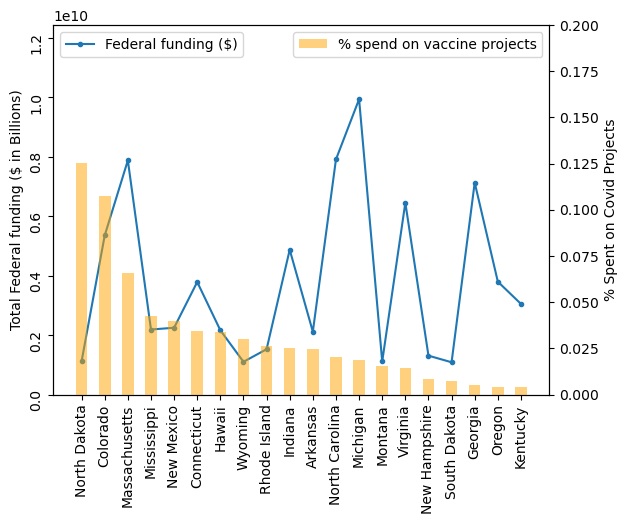

41419807889.0


In [28]:
### Update this figure using the covid_projects_df values as those can be filtered by project description.
# Create figure and axis #1

x_label = EARN_states['State/Territory'].iloc[0:20]

fig, ax1 = plt.subplots()
x = EARN_states['State/Territory'].iloc[0:20]

# plot line chart on axis #1
ax1.plot(x, EARN_states['total state plus total local federal grant'].iloc[0:20], marker= 'o', markersize=3) 
ax1.set_ylabel('Total Federal funding ($ in Billions)')
ax1.set_ylim(0, max(EARN_states['total state plus total local federal grant'])*.3)
ax1.legend(['Federal funding ($)'], loc="upper left")


# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.bar(x, EARN_states['Percent Spent on Covid Projects'].iloc[0:20], width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('% Spent on Covid Projects')
ax2.set_ylim(0, .2) #max(EARN_states['Percent Spent on Covid Projects']))
ax2.legend(['% spend on vaccine projects'], loc="upper right")

ax1.tick_params(rotation=90)
plt.xticks(rotation = 45)
plt.show()


print(max(EARN_states['total state plus total local federal grant']+500000))

In [33]:
fig.savefig('Resources/combination_plot.jpg', bbox_inches= 'tight')